In [1]:
%load_ext autoreload
%autoreload 2

from IPython.core.display import HTML
HTML("<style>.container { width: 90% !important; }</style>")

In [7]:
import utils

import sneks
import gym

import numpy as np
import torch
import torch.nn as nn

utils.info

{'torch_version': '1.3.1', 'torch_device': 'cuda', 'gym_version': '0.17.1'}

In [8]:
utils.use_virtual_display()

':1053'

In [12]:
# env = gym.make('snek-rgb-16-v1')
env = gym.make('CartPole-v1')


observation = env.reset()
action = env.action_space.sample()
observation, reward, done, info = env.step(action)

num_actions = env.action_space.n
obs_size = np.prod(env.observation_space.shape)

obs_size, num_actions, env.reward_range, # env.unwrapped.unwrapped.get_action_meanings()

(4, 2, (-inf, inf))

In [27]:
dqn = utils.DQNAgent(obs_size, num_actions)

dqn_persist, dqn_load_if_exists = utils.model_persistor(dqn, './.models/dqn.pkl')
dqn_load_if_exists()

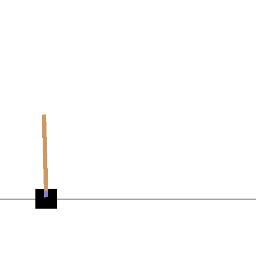

In [28]:
frames_generator = utils.play_env(env, dqn, duration=100)
utils.i_python_display_frames(frames_generator, fps=30)

In [15]:
generator = utils.get_experience_generator(env, dqn, bs=100)
batch, episode_rewards, _ = next(generator)
[t.shape for t in batch], episode_rewards

([(100, 4), (100,), (100,), (100, 4), (100,)],
 [12.0, 11.0, 11.0, 12.0, 14.0, 13.0, 27.0])

<IPython.core.display.Javascript object>


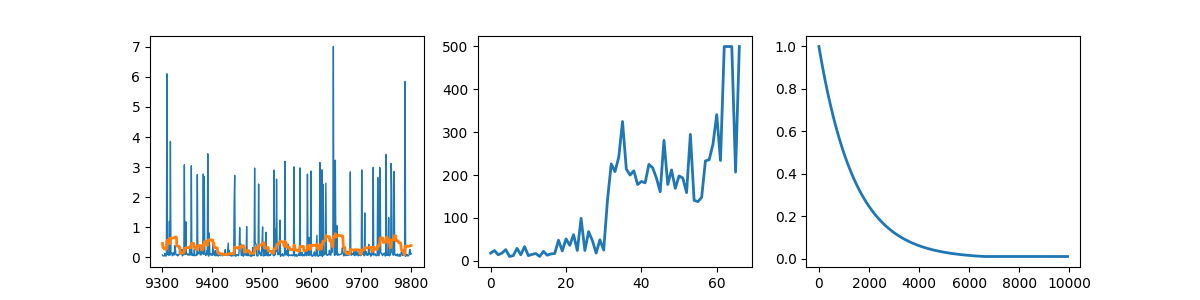

In [23]:
%matplotlib notebook

utils.dqn_optimize(
    env=env,
    model=dqn,
    its=10_000,
    lr=0.001,
    next_batch=utils.get_experience_generator(env, dqn, bs=128),
)

In [29]:
dqn_persist()

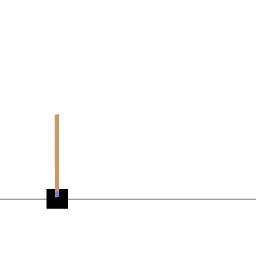

In [30]:
frames_generator = utils.play_env(env, dqn, duration=100)
utils.i_python_display_frames(frames_generator, fps=30)